In [1]:
import numpy as np
import netCDF4 as NC
import matplotlib.pyplot as plt
import glob
import sisl
import hubbard

In [64]:
H = hubbard.Hubbard('31cGNR.XV',nsc=[3,1,1],kmesh=[50,1,1])

Found 28 pz sites
   U   = 0.0
   Nup = 14
   Ndn = 14
Appending to 31cGNR.XV.nc


(2.2767299662218576e-07, -74.72755498367292)


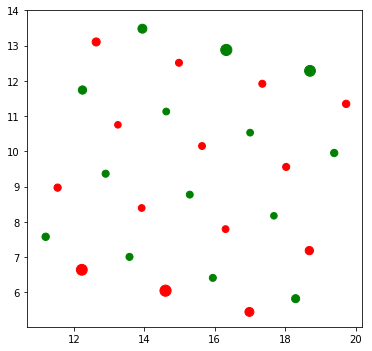

In [65]:
H.U = 5
H.read()
for i in range(1):
    print H.iterate(mix=1)
#H.plot_charge(f=400)
H.plot_polarization(f=400)
#H.save()

In [ ]:
for xc in [r'LDA', r'GGA']:
        if 'LDA' in xc:
            fn = xc+'/31-ribbon/8.870/Ebands/Electrons.nc' # LDA minimum
        else:
            fn = xc+'/31-ribbon/8.970/Ebands/Electrons.nc' # GGA minimum
        fig = plt.figure(figsize=(4,6));
        axes = plt.axes();

        # Add siesta bands
        k1,ev = readNC(fn)
        egap2 = (ev[0,9]+ev[0,10])/2
        plt.plot(ka,ev-egap2,'k');
        # Add TB results
        plt.plot(ka, evtb-egap, 'r')
        plt.ylim(-4,4)
        plt.rc('font', family='Bitstream Vera Serif', size=16)
        plt.rc('text', usetex=True)

        axes.set_title(xc+r' vs.~'+tb)
        axes.set_xlabel(r'$ka/\pi$')
        axes.set_ylabel(r'$E_{nk}$ (eV)')
        #plt.xticks(np.arange(0,.6,0.1))
        plt.subplots_adjust(left=0.2)
        plt.savefig('test'+xc+'-'+tb+'-%.2f-%.2f-%.2f.pdf'%(t1,t2,t3))
        plt.close('all')

In [2]:
H = hubbard.Hubbard('mol6.XV')

Found 112 pz sites
   U   = 0.0
   Nup = 56
   Ndn = 56
Appending to mol6.XV.nc


In [12]:
print np.arange(0,1,1./5)

[0.  0.2 0.4 0.6 0.8]


In [39]:
Urng = np.linspace(0.0,4.0,21)
print Urng

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]


In [41]:
ES = 0*Urng
H.Nup = 56
H.Ndn = 56
for j,u in enumerate(Urng):
    H.U = u
    H.read()
    [H.iterate(mix=1) for i in range(1)]
    dn, e = H.iterate(mix=1)
    H.save()
    print u, dn, e
    ES[j] = e

Wrote (U,Nup,Ndn)=(0.00,56,56) data to mol6.XV.nc
0.0 0.0 -436.4927042325995
Wrote (U,Nup,Ndn)=(0.20,56,56) data to mol6.XV.nc
0.2 4.1572301157088987e-13 -430.88612353167844
Wrote (U,Nup,Ndn)=(0.40,56,56) data to mol6.XV.nc
0.4 2.703393064962256e-13 -425.2798727249801
Wrote (U,Nup,Ndn)=(0.60,56,56) data to mol6.XV.nc
0.6000000000000001 1.8685053504441385e-13 -419.6739304127801
Wrote (U,Nup,Ndn)=(0.80,56,56) data to mol6.XV.nc
0.8 3.4755531785890525e-13 -414.0682768339461
Wrote (U,Nup,Ndn)=(1.00,56,56) data to mol6.XV.nc
1.0 2.8965718712470334e-13 -408.4628936443016
Wrote (U,Nup,Ndn)=(1.20,56,56) data to mol6.XV.nc
1.2000000000000002 2.8738122992422177e-13 -402.85776374812644
Wrote (U,Nup,Ndn)=(1.40,56,56) data to mol6.XV.nc
1.4000000000000001 2.681188604469753e-13 -397.2528711710814
Wrote (U,Nup,Ndn)=(1.60,56,56) data to mol6.XV.nc
1.6 2.293165657363261e-13 -391.64820096437035
Wrote (U,Nup,Ndn)=(1.80,56,56) data to mol6.XV.nc
1.8 3.0370150838621157e-13 -386.0437391314525
Wrote (U,Nup,N

In [40]:
ET = 0*Urng
H.Nup = 57
H.Ndn = 55
for j,u in enumerate(Urng):
    H.U = u
    H.read()
    [H.iterate(mix=1) for i in range(30)]
    dn, e = H.iterate(mix=1)
    H.save()
    print u, dn, e
    ET[j] = e

Wrote (U,Nup,Ndn)=(0.00,57,55) data to mol6.XV.nc
0.0 0.0 -436.2507632110554
Wrote (U,Nup,Ndn)=(0.20,57,55) data to mol6.XV.nc
0.2 4.421463195569686e-13 -430.65598988253544
Wrote (U,Nup,Ndn)=(0.40,57,55) data to mol6.XV.nc
0.4 1.8002266344296913e-13 -425.0616604218711
Wrote (U,Nup,Ndn)=(0.60,57,55) data to mol6.XV.nc
0.6000000000000001 2.0816681711721685e-13 -419.4677940202117
Wrote (U,Nup,Ndn)=(0.80,57,55) data to mol6.XV.nc
0.8 2.6084689963568053e-13 -413.87441389024684
Wrote (U,Nup,Ndn)=(1.00,57,55) data to mol6.XV.nc
1.0 3.287925487427401e-13 -408.28154774978714
Wrote (U,Nup,Ndn)=(1.20,57,55) data to mol6.XV.nc
1.2000000000000002 1.9279022822615843e-13 -402.6892284657417
Wrote (U,Nup,Ndn)=(1.40,57,55) data to mol6.XV.nc
1.4000000000000001 3.03146396873899e-13 -397.09749490920007
Wrote (U,Nup,Ndn)=(1.60,57,55) data to mol6.XV.nc
1.6 2.8133051444001467e-13 -391.50639309918836
Wrote (U,Nup,Ndn)=(1.80,57,55) data to mol6.XV.nc
1.8 2.8149704789370844e-13 -385.9159777562958
Wrote (U,Nup,

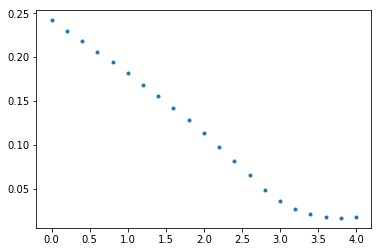

In [42]:
plt.plot(Urng,ET-ES,'.')
plt.show()

In [30]:
    
H.U = 3.2
H.Nup = 56
H.Ndn = 56
H.read()
#H.init_density()
[H.iterate(mix=1) for i in range(100)]
print H.iterate()
H.save()

(2.471911564327911e-13, -346.8376142325477)
Wrote (U,Nup,Ndn)=(3.20,56,56) data to mol6.XV.nc


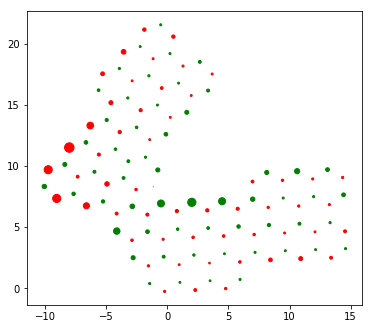

In [31]:
H.plot_polarization(f=400)
#H.plot_charge(f=40)

[[3.         3.2       ]
 [0.03585933 0.02717058]]


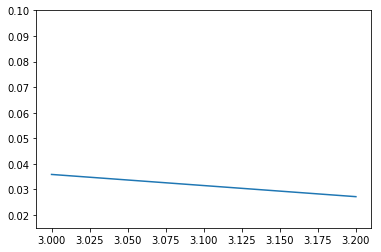

In [19]:
dat = []
for i in S.conv.keys():
    dat.append([i,T.conv[i][2]-S.conv[i][2]])
dat.sort()
dat = np.array(dat).T
print dat
plt.plot(dat[0],dat[1])
plt.ylim([0.015,0.1])
plt.show()

In [13]:
T.retrieve_state(3.)

Retrieved state for U = 3.0000 eV


In [20]:
T.conv

{3.0: [array([0.50501621, 0.5221993 , 0.50726152, 0.49482553, 0.4967913 ,
         0.50600542, 0.49538623, 0.50774719, 0.50973159, 0.49513515,
         0.49358251, 0.50131716, 0.49653836, 0.50484097, 0.51567943,
         0.58802891, 0.50415229, 0.50571437, 0.49561371, 0.4982023 ,
         0.49067944, 0.50717513, 0.47517585, 0.60169315, 0.49388828,
         0.48880887, 0.51178333, 0.47852185, 0.57155699, 0.48154353,
         0.49393478, 0.50656543, 0.49315726, 0.49114142, 0.50683541,
         0.51536925, 0.50476218, 0.4934176 , 0.49383875, 0.50227902,
         0.49030506, 0.50033171, 0.49310162, 0.52309547, 0.50220989,
         0.50417549, 0.49481362, 0.49550204, 0.48988439, 0.50121888,
         0.48575089, 0.53749661, 0.50155598, 0.48783918, 0.5194767 ,
         0.48709502, 0.52025782, 0.49682008, 0.55372543, 0.49194789,
         0.55547489, 0.59830738, 0.5428025 , 0.54420765, 0.48364158,
         0.52554642, 0.47950279, 0.51428378, 0.47854619, 0.59803733,
         0.51081598, 0.536925

In [31]:
ncf.close()
ncf = NC.Dataset('test.nc','w')
ncf.createDimension('unl',None)
ncf.createDimension('spin',2)
ncf.createDimension('sites',len(T.pi_geom))


<type 'netCDF4._netCDF4.Dimension'>: name = 'sites', size = 112

In [32]:
ncf.createVariable('U', 'f8', ("unl",))
ncf.createVariable('density', 'f8', ("unl","spin","sites"))

<type 'netCDF4._netCDF4.Variable'>
float64 density(unl, spin, sites)
unlimited dimensions: unl
current shape = (0, 2, 112)
filling on, default _FillValue of 9.96920996839e+36 used

In [35]:
ncf['U'][:] = T.conv.keys()

In [36]:
print T.conv.keys()

[3.0, 3.2]


In [37]:
ncf.sync()

In [38]:
ncf['U'][:]

array([3. , 3.2])

In [40]:
if 3. in ncf['U'][:]:
    print 'hej'

hej
